In [0]:
%tensorflow_version 2.x

## CNN

### 圖形的層數
>以 RGB (R,G,B) 為例, 代表一個圖形單一 pixle 的層數為三, 灰階的層數就是1

> 一張長寬 32*32 的 RGB 三層圖, 以 (32,32,3) 表示

### convolutional 卷積(改變通道數)
> 使用較小的濾鏡 fitler 檢查局部特徵，如果出現在對的地方就加分，反之扣分。

> 每個位置: sigma_分數*pixle

> padding -> 原圖補空格, 在做 cov 的時候原圖不會一直縮小

> 如果是 RGB (32,32,3), sigma_Wr*pixle_r + sigma_Wg*pixle_g + sigma_Wb*pixle_b -> (32,32,64)

### pooling 池化 -> 降低計算量(改變寬和高)
> maxpooling -> 區域取最大值, 來代表這個區域

###
> 特徵的再過濾, 特徵的再萃取

> 圖片越小 -> 層數不要太多, 圖片大再增加層數

###
> dropout -> 類似 normolization, 隨機丟棄某些神經元, 避免那些 weight 占比過大的神經元佔據大多梯度下降因素


In [0]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [0]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
trans = [
    "airplane",									
    "automobile",									
    "bird",										
    "cat",										
    "deer",										
    "dog",									
    "frog",										
    "horse",										
    "ship",										
    "truck"
]

horse


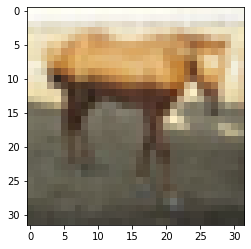

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
idx = 2000
print(trans[y_train[idx][0]])
plt.imshow(x_train[idx])

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

layers = [
    # 27(1 filter)*64=1728, + 64 個 filter->64個 bias(特徵及格分數) = 1792
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 576(1 filter) * 128 + 128(bias) = 73856
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.25),
    Dense(10, activation="softmax")
]
model = Sequential(layers=layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [0]:
# SparseCategoricalCrossEntropy-> 檔案真正需要的時候才做轉換(省記憶體、幫你做 one-hot)
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer="adam",
              metrics=["accuracy"])

In [0]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255
# RNN/LSTM 不能 GPU 平行運算, 較少人用, attention 可以, 所以比較多人用

In [0]:
# 存模型: model.save("xxx.h5")
# 讀取模型: 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint("cnn.h5", save_best_only=True)
]
model.fit(x_train_norm,
          y_train,
          batch_size=200,
          epochs=100,
          validation_split=0.1,
          verbose=2,
          callbacks=callbacks) # 有 callbacks 可以在設定的條件下自動停止

Epoch 1/100
225/225 - 8s - loss: 1.6052 - accuracy: 0.4130 - val_loss: 1.2838 - val_accuracy: 0.5376
Epoch 2/100
225/225 - 8s - loss: 1.1645 - accuracy: 0.5876 - val_loss: 1.0018 - val_accuracy: 0.6506
Epoch 3/100
225/225 - 8s - loss: 0.9677 - accuracy: 0.6614 - val_loss: 0.8926 - val_accuracy: 0.6876
Epoch 4/100
225/225 - 8s - loss: 0.8374 - accuracy: 0.7058 - val_loss: 0.8139 - val_accuracy: 0.7194
Epoch 5/100
225/225 - 8s - loss: 0.7383 - accuracy: 0.7428 - val_loss: 0.7569 - val_accuracy: 0.7340
Epoch 6/100
225/225 - 8s - loss: 0.6503 - accuracy: 0.7737 - val_loss: 0.7366 - val_accuracy: 0.7484
Epoch 7/100
225/225 - 8s - loss: 0.5776 - accuracy: 0.7975 - val_loss: 0.7155 - val_accuracy: 0.7562
Epoch 8/100
225/225 - 8s - loss: 0.5038 - accuracy: 0.8216 - val_loss: 0.6894 - val_accuracy: 0.7710
Epoch 9/100
225/225 - 8s - loss: 0.4404 - accuracy: 0.8463 - val_loss: 0.7335 - val_accuracy: 0.7610
Epoch 10/100
225/225 - 8s - loss: 0.3764 - accuracy: 0.8666 - val_loss: 0.7089 - val_accura

In [0]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.7279 - accuracy: 0.7571


[0.7279077172279358, 0.757099986076355]

In [0]:
print(pre.shape)
print(y_test.shape) # 表格

y_test_reshape = y_test.reshape(-1) # 自動計算
print(y_test_reshape.shape)

(10000,)
(10000, 1)
(10000,)


In [0]:
import pandas as pd
# 不是在tf裡, 帶入原本的y
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test_reshape, pre)
c = ["{}(預測)".format(i) for i in trans]
i = ["{}(真實)".format(i) for i in trans]
pd.DataFrame(mat, columns=c, index=i)

,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(真實),834,10,38,13,19,11,9,11,25,30
automobile(真實),20,826,4,8,3,4,14,9,20,92
bird(真實),58,1,676,38,65,55,55,37,6,9
cat(真實),16,5,60,552,61,196,64,33,5,8
deer(真實),12,3,60,49,709,45,51,61,9,1
dog(真實),16,1,41,127,47,686,28,48,4,2
frog(真實),5,3,38,48,27,28,839,5,3,4
horse(真實),11,1,30,26,49,45,4,829,0,5
ship(真實),80,23,22,17,11,8,5,8,803,23
truck(真實),36,56,9,20,3,18,6,20,15,817


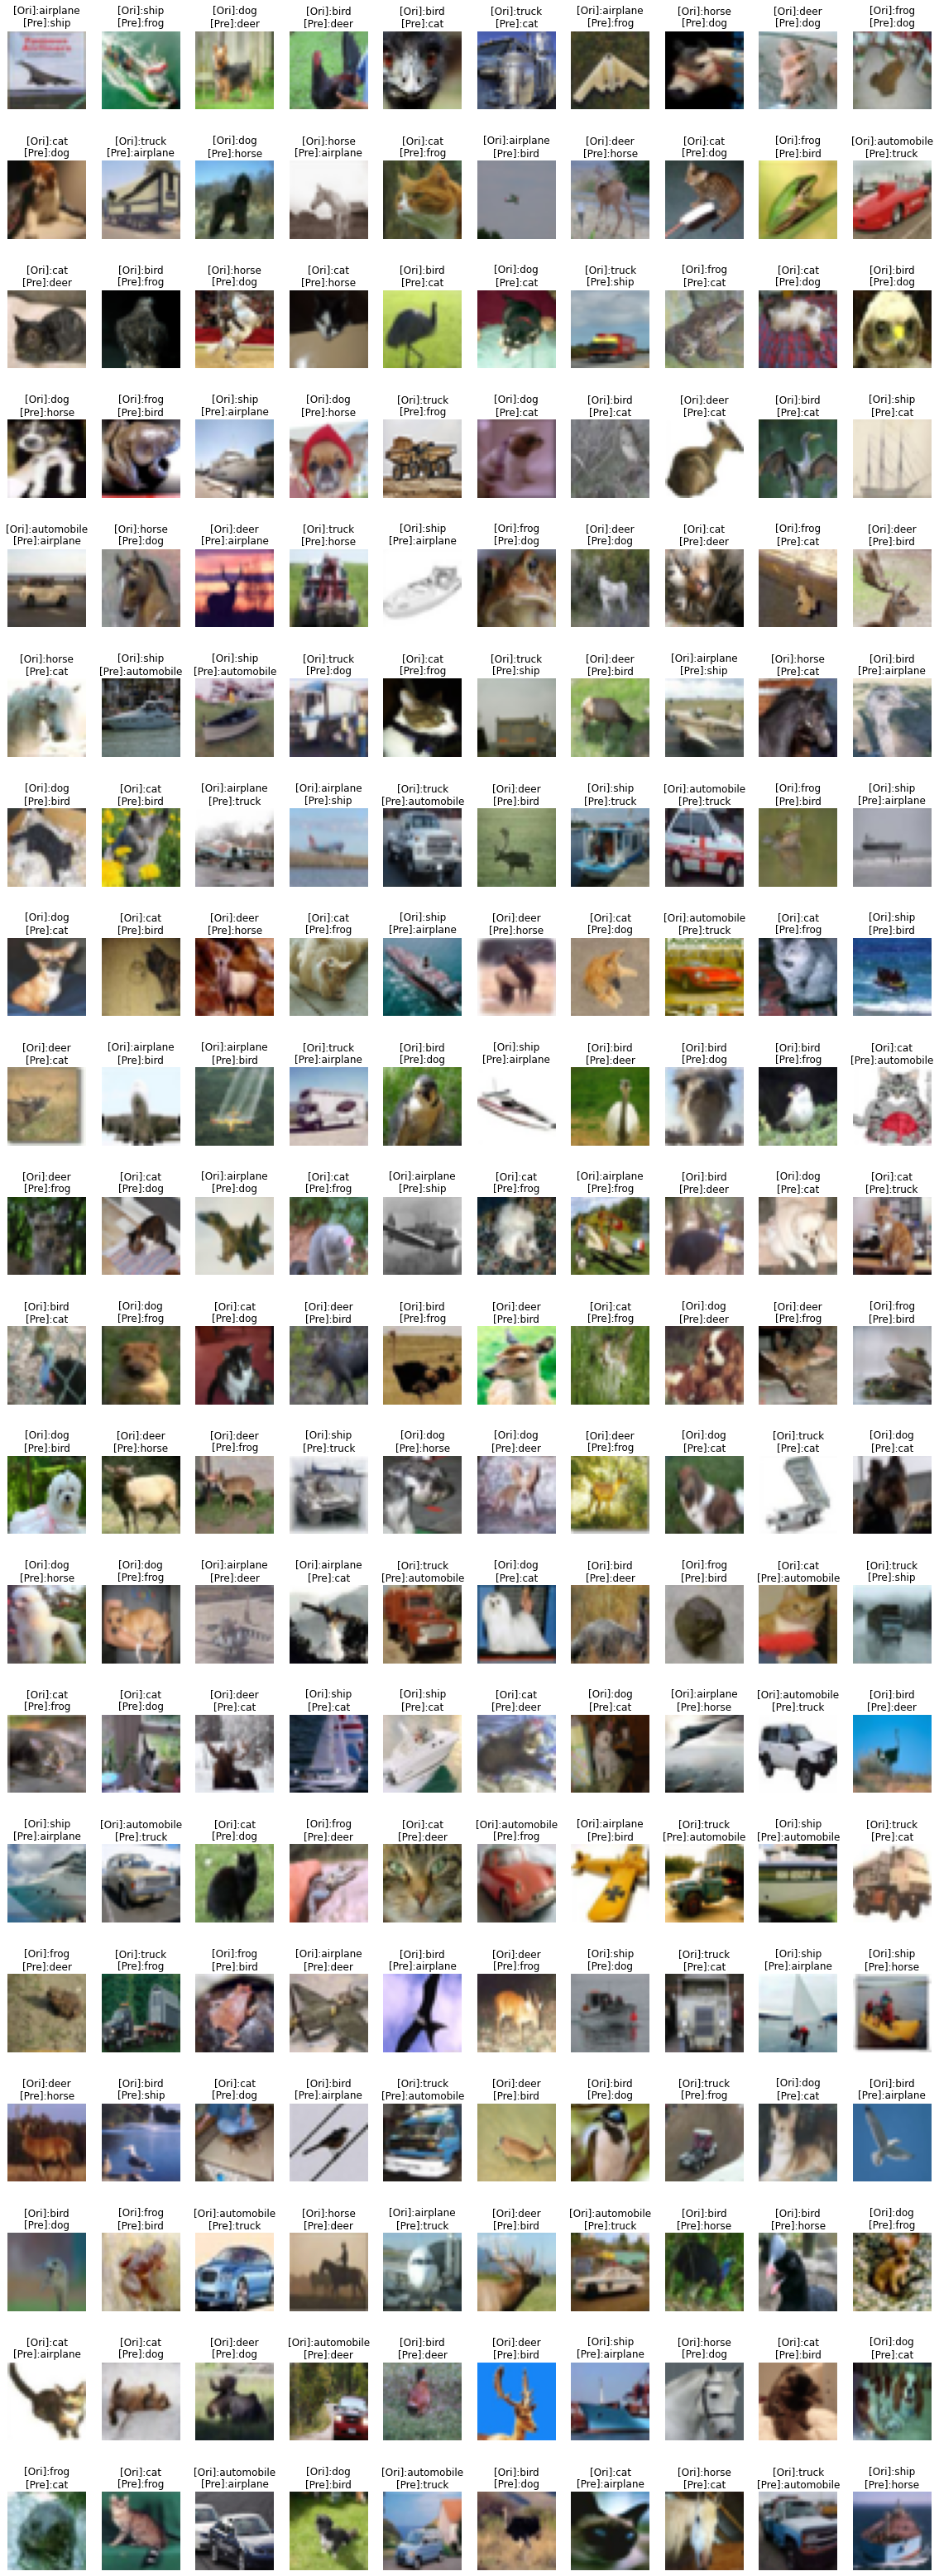

In [0]:
import numpy as np
# nonzero: 取出是True的index
# (x座標, y座標, z座標)
idx = np.nonzero(pre != y_test_reshape)[0]
idx = idx[:200]
# 預測錯誤的圖
false_img = x_test[idx]
false_answer = y_test_reshape[idx]
false_predict = pre[idx]

# 把圖變大一點才塞的下
plt.figure(figsize=(20, 60))
width = 10
height = len(false_img) // width + 1
for i, img in enumerate(false_img):
    plt.subplot(height, width, i+1)
    plt.axis("off")
    t = "[Ori]:{}\n[Pre]:{}".format(trans[false_answer[i]],
                     trans[false_predict[i]])
    plt.title(t)
    plt.imshow(img)

In [0]:
'''讀取圖片並利用預訓練模型預測'''
from tensorflow.keras.preprocessing.image import load_img
fn = input("輸入檔名:")
img = load_img(fn, target_size=(32, 32))
# 剛剛帶入 (10000, 784)
# 現在帶入 (1, 784)
img_norm = np.array(img).reshape(-1, 32, 32, 3) / 255
ans = model.predict_classes(img_norm)[0]
print("應該是:", ans)
plt.imshow(img, cmap="gray")

In [0]:
# 讀取 model
from tensorflow.keras.models import load_model
loaded = load_model("cnn.h5")
# 讀取完以後 1. predict 2. fit(不用 compile)
loaded.evaluate(x_test_norm, y_test)
# 如果想看 h5 -> HDFView

313/313 [==============================] - 2s 6ms/step - loss: 0.7279 - accuracy: 0.7571


[0.7279077172279358, 0.757099986076355]